Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

#setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

#show all columns on output
pd.set_option('display.max_columns', 999)

Data Exploration

In [2]:
#because file uses 'ISO-8859-1' encoding and pandas by default reads in UTF-8
df = pd.read_csv('./data/data.csv', encoding='ISO-8859-1')

df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.00,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.00,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.00,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.00,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.00,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.00,United Kingdom


In [3]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#FOR NUMERIC DATA

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.00,541909,541909.00,406829.00
mean,9.55,2011-07-04 13:34:57.156386048,4.61,15287.69
min,-80995.00,2010-12-01 08:26:00,-11062.06,12346.00
25%,1.00,2011-03-28 11:34:00,1.25,13953.00
50%,3.00,2011-07-19 17:17:00,2.08,15152.00
75%,10.00,2011-10-19 11:27:00,4.13,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,218.08,NaN,96.76,1713.60


In [5]:

#for non-numeric data(objects or strings)
df.describe(include= 'O')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [6]:
df[df["CustomerID"].isna()].head(10)

#when we dont have a valid customer ID , the data becomes essentially useless. so in the data clening we can just drop these values

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [7]:
df[df["Quantity"]<0].head(10)

#in data description, C in invoiceno represents a cancellation. all of these  samples have that. 
#already looked us because quanity was negative and now we have another clue for data cleaning

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [8]:
df["InvoiceNo"] = df["InvoiceNo"].astype("str")
df[df["InvoiceNo"].str.match("\\d{6}$") == False].head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.00,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.00,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.00,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.00,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.00,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.00,United Kingdom


In [9]:

df["InvoiceNo"].str.replace("[0-9]", "", regex = True).unique()


array(['', 'C', 'A'], dtype=object)

In [10]:
df[df["InvoiceNo"].str.startswith("A")]
#apparently not related to any actual customers so most probably we will remove in cleaning

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [11]:
df["StockCode"] = df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$") == False]

df[(df["StockCode"].str.match("\\d{5}$") == False)& (df["StockCode"].str.match("\\d{5}[a-zA-Z]+$")== False)]["StockCode"].unique()

#we make assumption that the letters at the end are valid since there isnt more information in the data
#we look for unique values that dont have a valid stock code


array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

In [12]:
#checking the dot stockcode
df[df["StockCode"].str.contains("^PADS$")]
#we see dot has mostly nan customers
#similarly iterate through every value of the above array

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.00,13952.00,United Kingdom
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.00,15618.00,United Kingdom
358655,568158,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 12:22:00,0.00,16133.00,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.00,16198.00,United Kingdom


Notes on StockCode:

DOT --> Looks valid, postage charges--> exclude from clustering
D --> Looks valid, discouunt--> exclude from clustering
c2 --> Looks valid, carriage--> exclude from clustering
POST
M
BANK CHARGES
S
AMAZONFEE
DCGS0076
DCGS0003
gift_0001_40
DCGS0070
m
gift_0001_50
gift_0001_30
gift_0001_20
DCGS0055
DCGS0072
DCGS0074
DCGS0069
DCGS0057
DCGSSBOY
DCGSSGIRL
gift_0001_10
PADS --> LOOKS VALID --> INCLUDE
DCGS0004
DCGS0073
DCGS0071
DCGS0068
DCGS0067
DCGS0066P
B
CRUK


Data Cleaning

In [13]:
cleaned_df = df.copy()

In [14]:
cleaned_df["InvoiceNo"] = cleaned_df["InvoiceNo"].astype("str")

mask = (
    cleaned_df["InvoiceNo"].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [15]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")== True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")== True)
    | (cleaned_df["StockCode"].str.match("^PADS$")== True)
    )

cleaned_df = cleaned_df[mask]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [16]:
#dropping null customers

cleaned_df.dropna(subset=["CustomerID"], inplace = True)

cleaned_df

C:\Users\shehj\AppData\Local\Temp\ipykernel_7444\2275606356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["CustomerID"], inplace = True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [39]:
cleaned_df[cleaned_df["UnitPrice"]==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.00,12647.00,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00,16560.00,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00,14911.00,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00,13081.00,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00,13081.00,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.00,15107.00,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.00,17560.00,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.00,13239.00,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.00,13113.00,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.00,14410.00,United Kingdom


In [17]:
#dropping zero price items

cleaned_df = cleaned_df[cleaned_df["UnitPrice"]>0]

cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France


In [18]:
cleaned_df.describe()
#here we see that the minimum unitprice is still 0.00, which should not be the case since we removed that explicitly in the last step

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396340.00,396340,396340.00,396340.00
mean,13.01,2011-07-11 00:04:40.164908544,2.87,15301.69
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:16:00,1.25,13975.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:41:00,3.75,16803.00
max,80995.00,2011-12-09 12:50:00,649.50,18287.00
std,179.64,NaN,4.26,1709.96


In [19]:
cleaned_df["UnitPrice"].min()

np.float64(0.001)

In [20]:
len(cleaned_df)/len(df)

0.7313774083840645

Dropped 27% of records

Feature Engineering

In [21]:
cleaned_df["SalesLineTotal"]= cleaned_df["Quantity"]* cleaned_df["UnitPrice"]
cleaned_df


C:\Users\shehj\AppData\Local\Temp\ipykernel_7444\1584364153.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"]= cleaned_df["Quantity"]* cleaned_df["UnitPrice"]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesLineTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.00,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France,16.60


In [22]:
aggregated_df = cleaned_df.groupby("CustomerID", as_index = False) \
    .agg(
        MonetaryValue =("SalesLineTotal", "sum"),
        Frequency=("InvoiceNo", "nunique"),
        LastInvoiceDate=("InvoiceDate", "max")
        )

aggregated_df.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77183.60,1,2011-01-18 10:01:00
1,12347.00,4310.00,7,2011-12-07 15:52:00
2,12348.00,1437.24,4,2011-09-25 13:13:00
3,12349.00,1457.55,1,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [23]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77183.60,1,2011-01-18 10:01:00,325
1,12347.00,4310.00,7,2011-12-07 15:52:00,1
2,12348.00,1437.24,4,2011-09-25 13:13:00,74
3,12349.00,1457.55,1,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


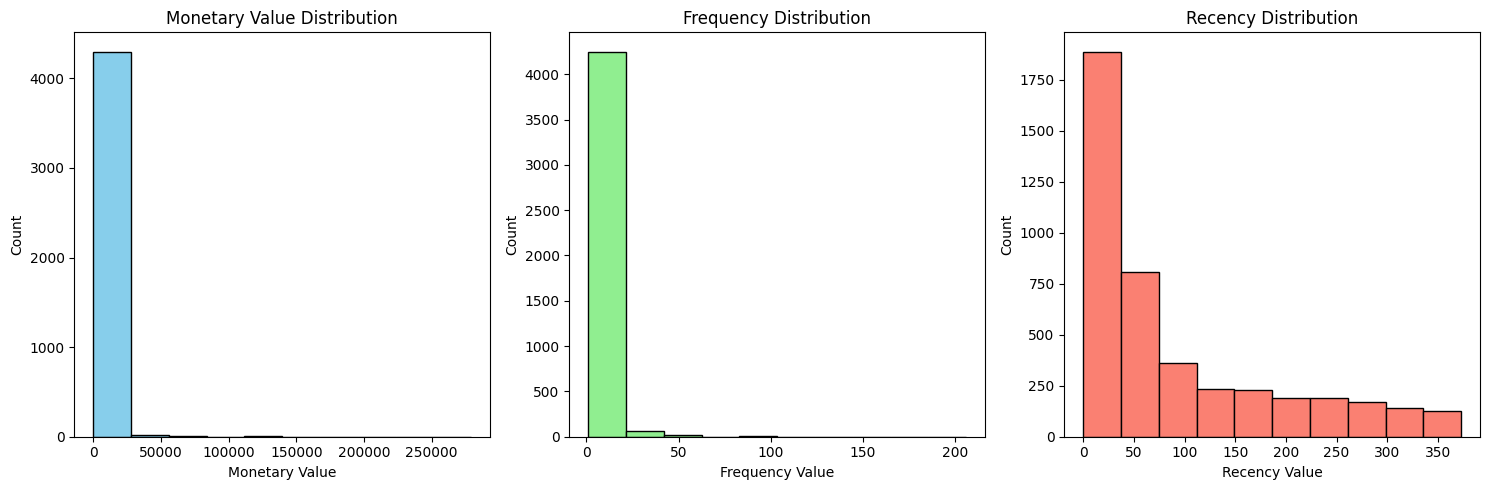

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) #1 column, 3 rows, 1st one
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1,3,2) #1 column, 3 rows, 1st one
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency Value')
plt.ylabel('Count')

plt.subplot(1,3,3) #1 column, 3 rows, 1st one
plt.hist(aggregated_df['Recency'], bins=10, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


from the plots, we can see that the distribution for monetary value and frequency is quite skewed. With a few outliers. Recency looks fine.
We will use boxplot from seaborn library to observe are data in more detail

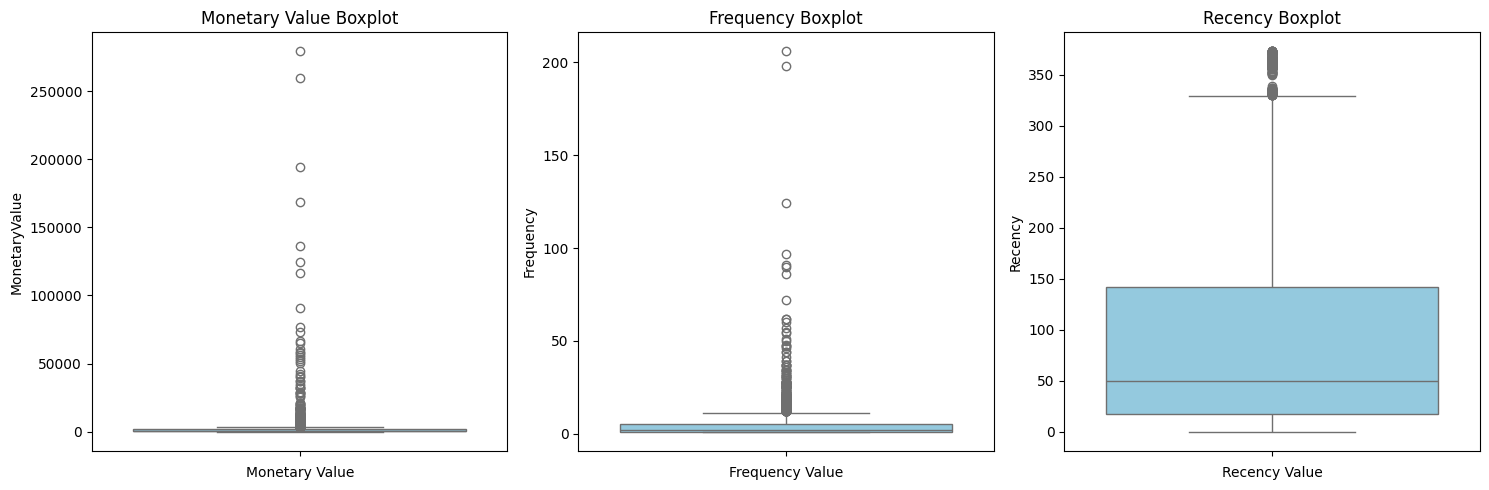

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) #1 column, 3 rows, 1st one
sns.boxplot(data = aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2) #1 column, 3 rows, 1st one
sns.boxplot(data = aggregated_df['Frequency'],color='skyblue')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency Value')

plt.subplot(1,3,3) #1 column, 3 rows, 1st one
sns.boxplot(data = aggregated_df['Recency'], color='skyblue')
plt.title('Recency Boxplot')
plt.xlabel('Recency Value')

plt.tight_layout()
plt.show()


In [39]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)

M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + (1.5* M_IQR))) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5* M_IQR))].copy()

monetary_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,425.00,425.00,425.00,425,425.00
mean,15033.64,12568.00,16.65,2011-11-14 08:29:09.741176576,24.72
min,12346.00,3622.68,1.00,2010-12-02 15:27:00,0.00
25%,13324.00,4359.32,8.00,2011-11-15 14:22:00,3.00
50%,15005.00,5891.61,12.00,2011-11-29 12:09:00,10.00
75%,16655.00,9430.52,19.00,2011-12-06 12:09:00,23.00
max,18251.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1797.85,26097.90,19.07,NaN,47.08


In [41]:
F_Q1 = aggregated_df["Frequency"].quantile(0.25)
F_Q3 = aggregated_df["Frequency"].quantile(0.75)

F_IQR =F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"] > (F_Q3 + (1.5* F_IQR))) | (aggregated_df["Frequency"] < (F_Q1 - 1.5* F_IQR))].copy()


frequency_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,278.00,278.00,278.00,278,278.00
mean,15355.67,14488.01,23.09,2011-11-25 21:49:19.640287744,13.17
min,12395.00,1296.44,12.00,2010-12-02 15:27:00,0.00
25%,13880.25,4197.77,13.00,2011-11-23 20:17:15,2.00
50%,15290.50,6283.52,17.00,2011-12-03 13:42:00,5.50
75%,16781.25,11040.84,25.00,2011-12-07 12:15:30,15.00
max,18283.00,279138.02,206.00,2011-12-09 12:49:00,371.00
std,1745.00,30142.78,21.17,NaN,30.37


Also, some of the monetary value outliers could be overlapping with the frequency outliers
Makes intuitive sense because if someone is buying stuff frequently then they are probably spending a lot as well

In [44]:
non_outliers_df.describe()

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3863.00,3863.00,3863.00,3863,3863.00
mean,15323.85,853.81,2.76,2011-08-31 01:42:04.721718784,99.94
min,12348.00,3.75,1.00,2010-12-01 09:53:00,0.00
25%,13850.50,278.50,1.00,2011-07-01 15:21:00,21.00
50%,15333.00,570.46,2.00,2011-10-11 14:24:00,58.00
75%,16798.00,1187.01,4.00,2011-11-17 13:39:00,160.00
max,18287.00,3619.17,11.00,2011-12-09 12:50:00,373.00
std,1709.73,794.61,2.17,NaN,101.87


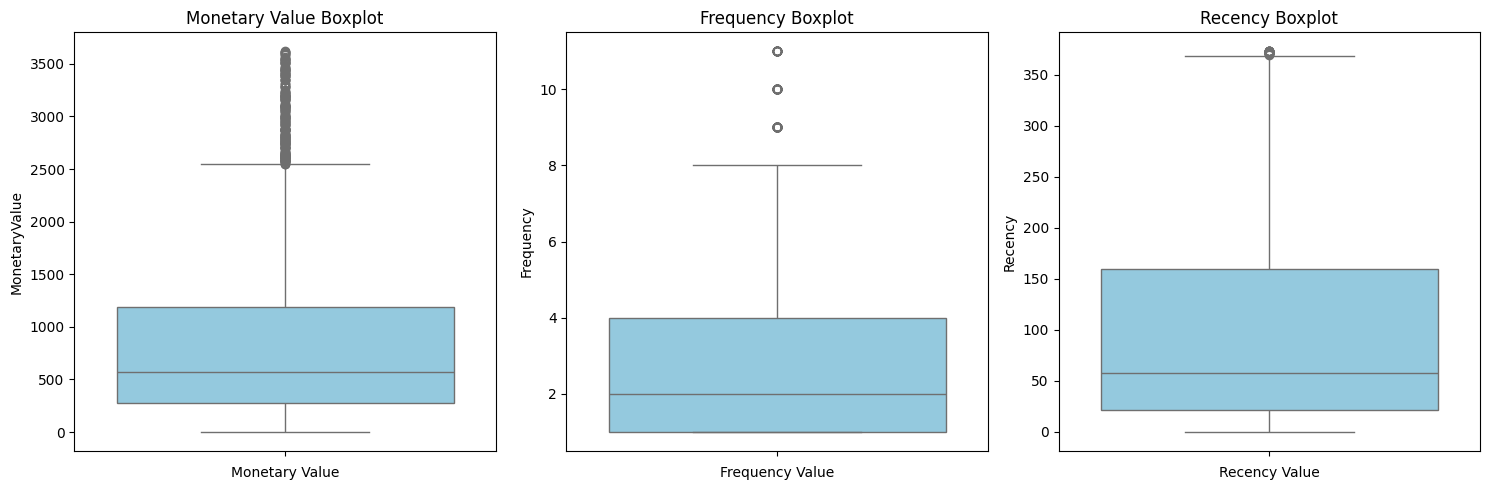

In [45]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1) #1 column, 3 rows, 1st one
sns.boxplot(data = non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1,3,2) #1 column, 3 rows, 1st one
sns.boxplot(data = non_outliers_df['Frequency'],color='skyblue')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency Value')

plt.subplot(1,3,3) #1 column, 3 rows, 1st one
sns.boxplot(data = non_outliers_df['Recency'], color='skyblue')
plt.title('Recency Boxplot')
plt.xlabel('Recency Value')

plt.tight_layout()
plt.show()


Even now we have some outliers but this data is now WAY better than the previous box plot
So we will proceed with plotting the data across 3 dimensions, monetary value, frequency and recency.

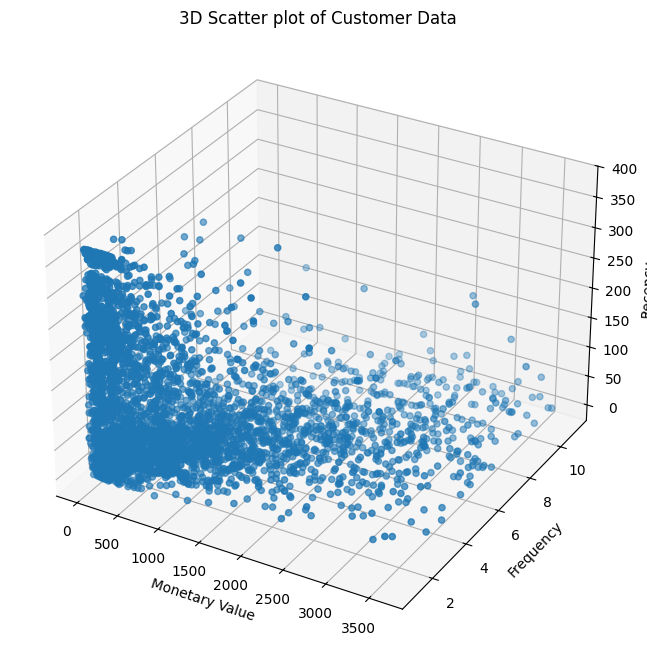

In [47]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title('3D Scatter plot of Customer Data')
plt.show()

K Means algorithm is quite sensitive to scaling
But in our plot the scales are different
Hence we have to scale the data so that the algorithm treats all three features with equal imprtance(equal scales)
We will use standard scaling
We will finally use Scikit-Learn!

In [48]:
scaler = StandardScaler() #standarscaler is a class in sklearn

scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])

scaled_data

array([[ 0.73432565,  0.57425162, -0.25471707],
       [ 0.75988873, -0.8096124 , -0.80452635],
       [-0.70410412, -0.8096124 ,  2.05251827],
       ...,
       [-0.97292551, -0.8096124 ,  0.78599334],
       [-0.85054746, -0.34832439, -0.9125246 ],
       [ 1.23783397,  0.11296362, -0.5688938 ]], shape=(3863, 3))

In [51]:
non_outliers_df.index

Index([   2,    3,    4,    5,    6,    7,    8,    9,   11,   13,
       ...
       4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4333],
      dtype='int64', length=3863)

In [53]:
#we convert scaled_Data to a datafrane
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns = ("MonetaryValue", "Frequency", "Recency"))   

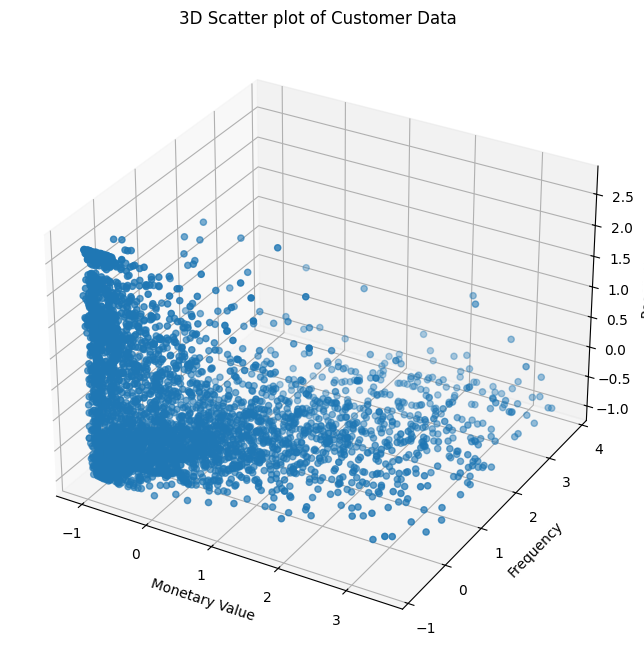

In [54]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title('3D Scatter plot of Customer Data')
plt.show()

KMeans Clustering
The no of clusters is determined by the no of centroids. 'K means' where k is variable. 
This is determined using the elbow method.
Basically for each value of k we calculate the inertia, or, the sum of squared distances from each point to its nearest cluster center.
The lower the inertia, the tighter the cluster and the better the fit.

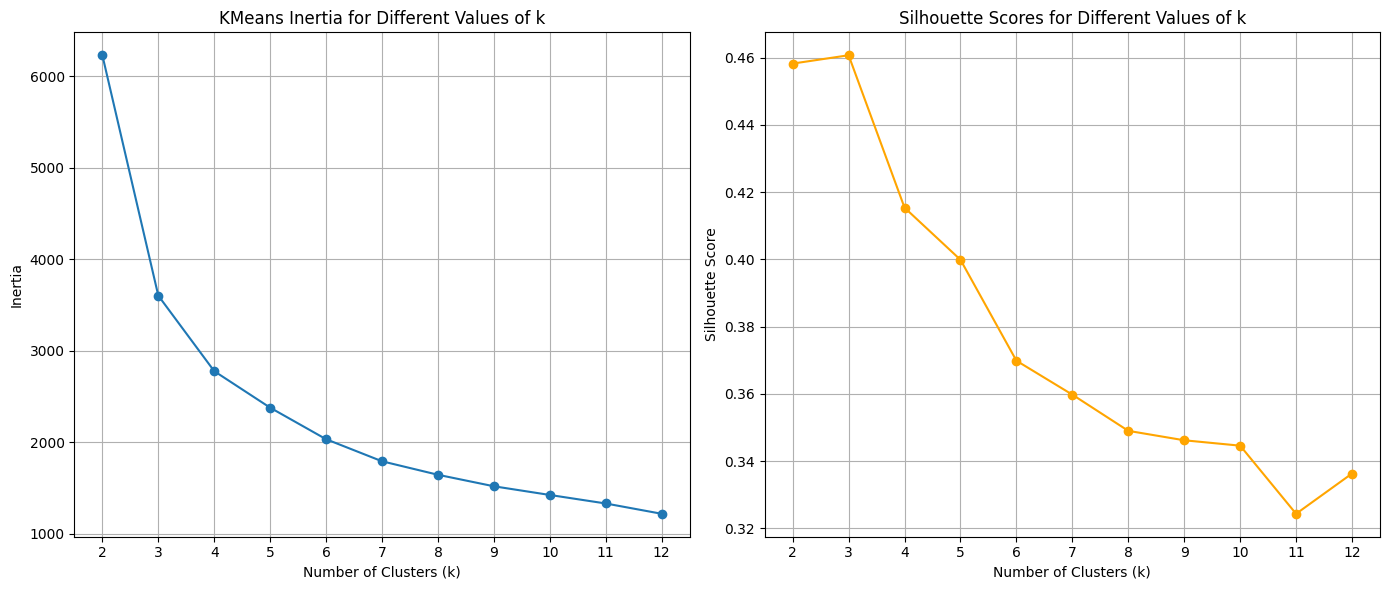

In [57]:
max_k = 12

inertia = []
silhouette_scores = []

k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters = k, random_state=42, max_iter = 1000)

    cluster_labels=kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

Between k=4 and k=5, we get stability. 
But we will use another technique or metric to make sure we make the right choice
That is clled Silhouette Score:
For each data point:

a = how close it is to other points in the same cluster (intra-cluster distance)
b = how close it is to points in the nearest other cluster (inter-cluster distance)

Then the Silhouette Score for that point is:
s = (a-b)/ma(a,b)
 
Score ranges from -1 to +1

+1: perfect match to its cluster and far from others 
0: on the border between clusters 
-1: might be in the wrong cluster

So we choose 4

In [58]:
kmeans = KMeans(n_clusters = 4, random_state=42, max_iter = 1000)

cluster_labels=kmeans.fit_predict(scaled_data_df)

cluster_labels

array([3, 0, 1, ..., 1, 0, 3], shape=(3863,), dtype=int32)

clusters are assigned:

In [59]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

C:\Users\shehj\AppData\Local\Temp\ipykernel_7444\1071184375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4328,18278.00,173.90,1,2011-09-27 11:58:00,73,0
4329,18280.00,180.60,1,2011-03-07 09:52:00,277,1
4330,18281.00,80.82,1,2011-06-12 10:53:00,180,1
4331,18282.00,178.05,2,2011-12-02 11:43:00,7,0


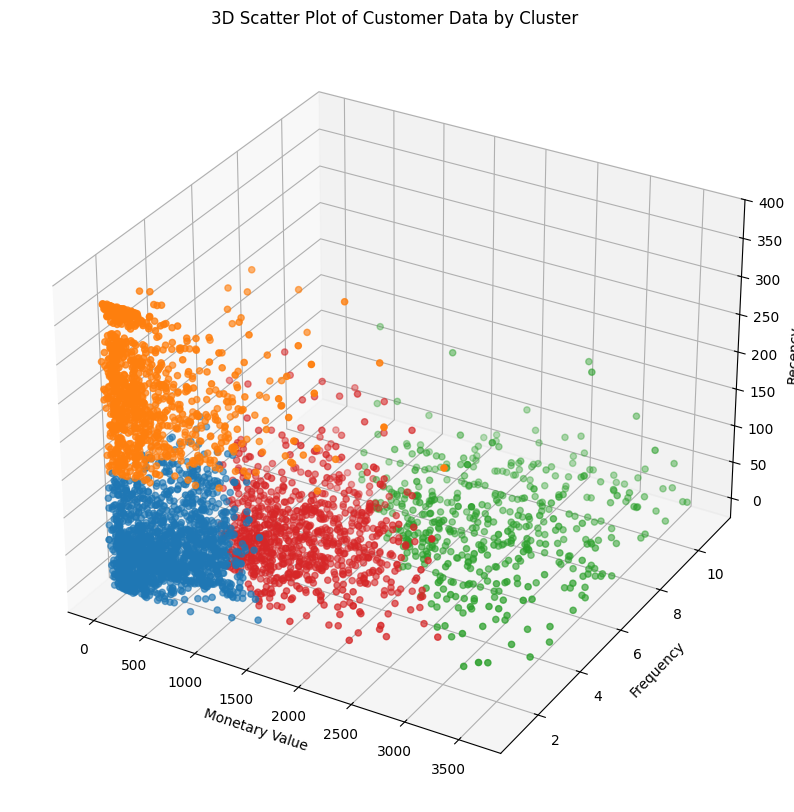

In [64]:
cluster_colors = {0: '#1f77b4', # Blue
                  1: '#ff7f0e', # Orange
                  2: '#2ca02c', # Green
                  3: '#d62728'} # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c =colors,
                     marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

Interpreting clusters more vigorously. Get more specific in analysis
We will do that using a violin plot
A violin plot shows: Distribution of data (like a histogram or KDE), Median and interquartile range (like a box plot), The density of values at different levels
So basically, it's a box plot + mirrored density curve.



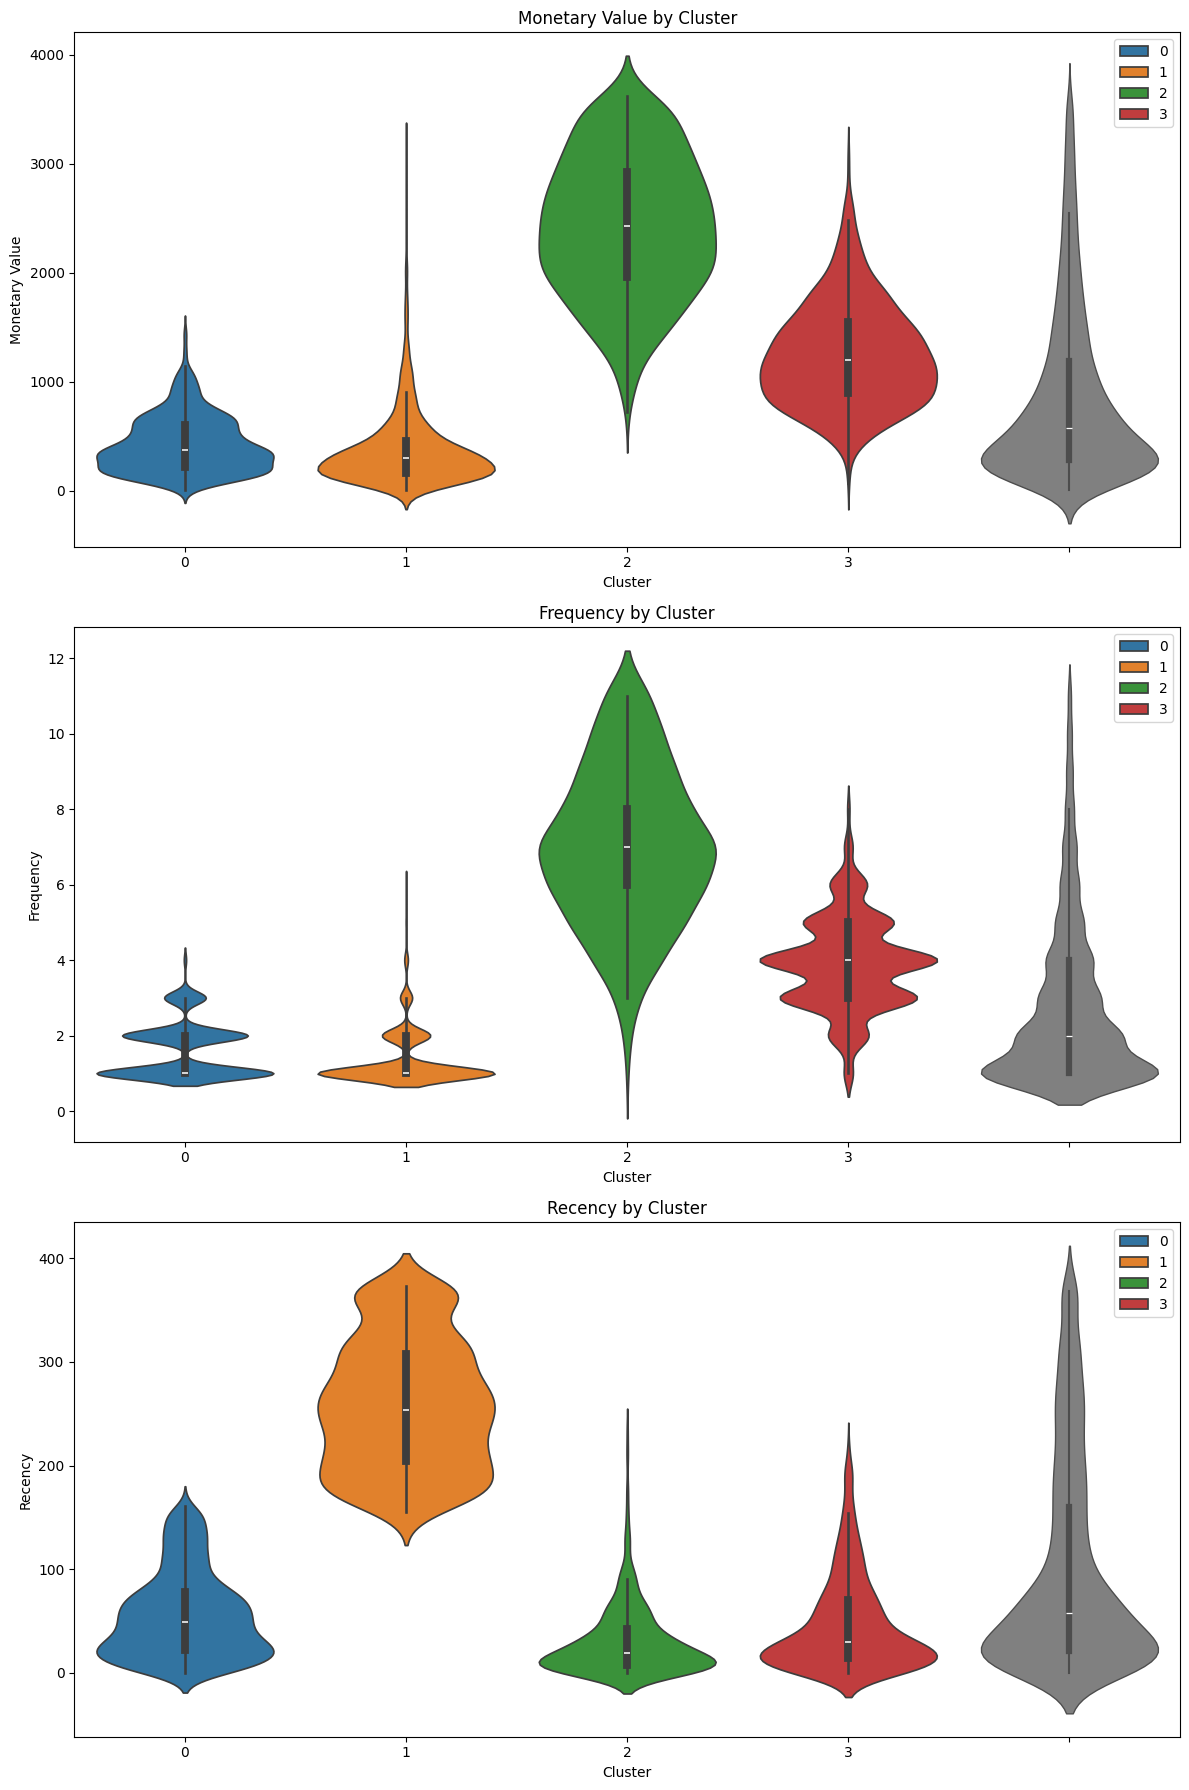

In [65]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster 0 (Blue): "Retain"
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.
Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

Cluster 1 (Orange): "Re-Engage"
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.
Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

Cluster 2 (Green): "Nurture"
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.
Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

Cluster 3 (Red): "Reward"
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.
Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.
Summary of Cluster Names:

Cluster 0 (Blue): "Retain"
Cluster 1 (Orange): "Re-Engage"
Cluster 2 (Green): "Nurture"
Cluster 3 (Red): "Reward"

In [66]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77183.60,1,2011-01-18 10:01:00,325,-1
1,12347.00,4310.00,7,2011-12-07 15:52:00,1,-1
10,12357.00,6207.67,1,2011-11-06 16:07:00,32,-1
12,12359.00,6372.58,4,2011-10-13 12:47:00,57,-1
15,12362.00,4737.23,10,2011-12-06 15:40:00,2,-1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


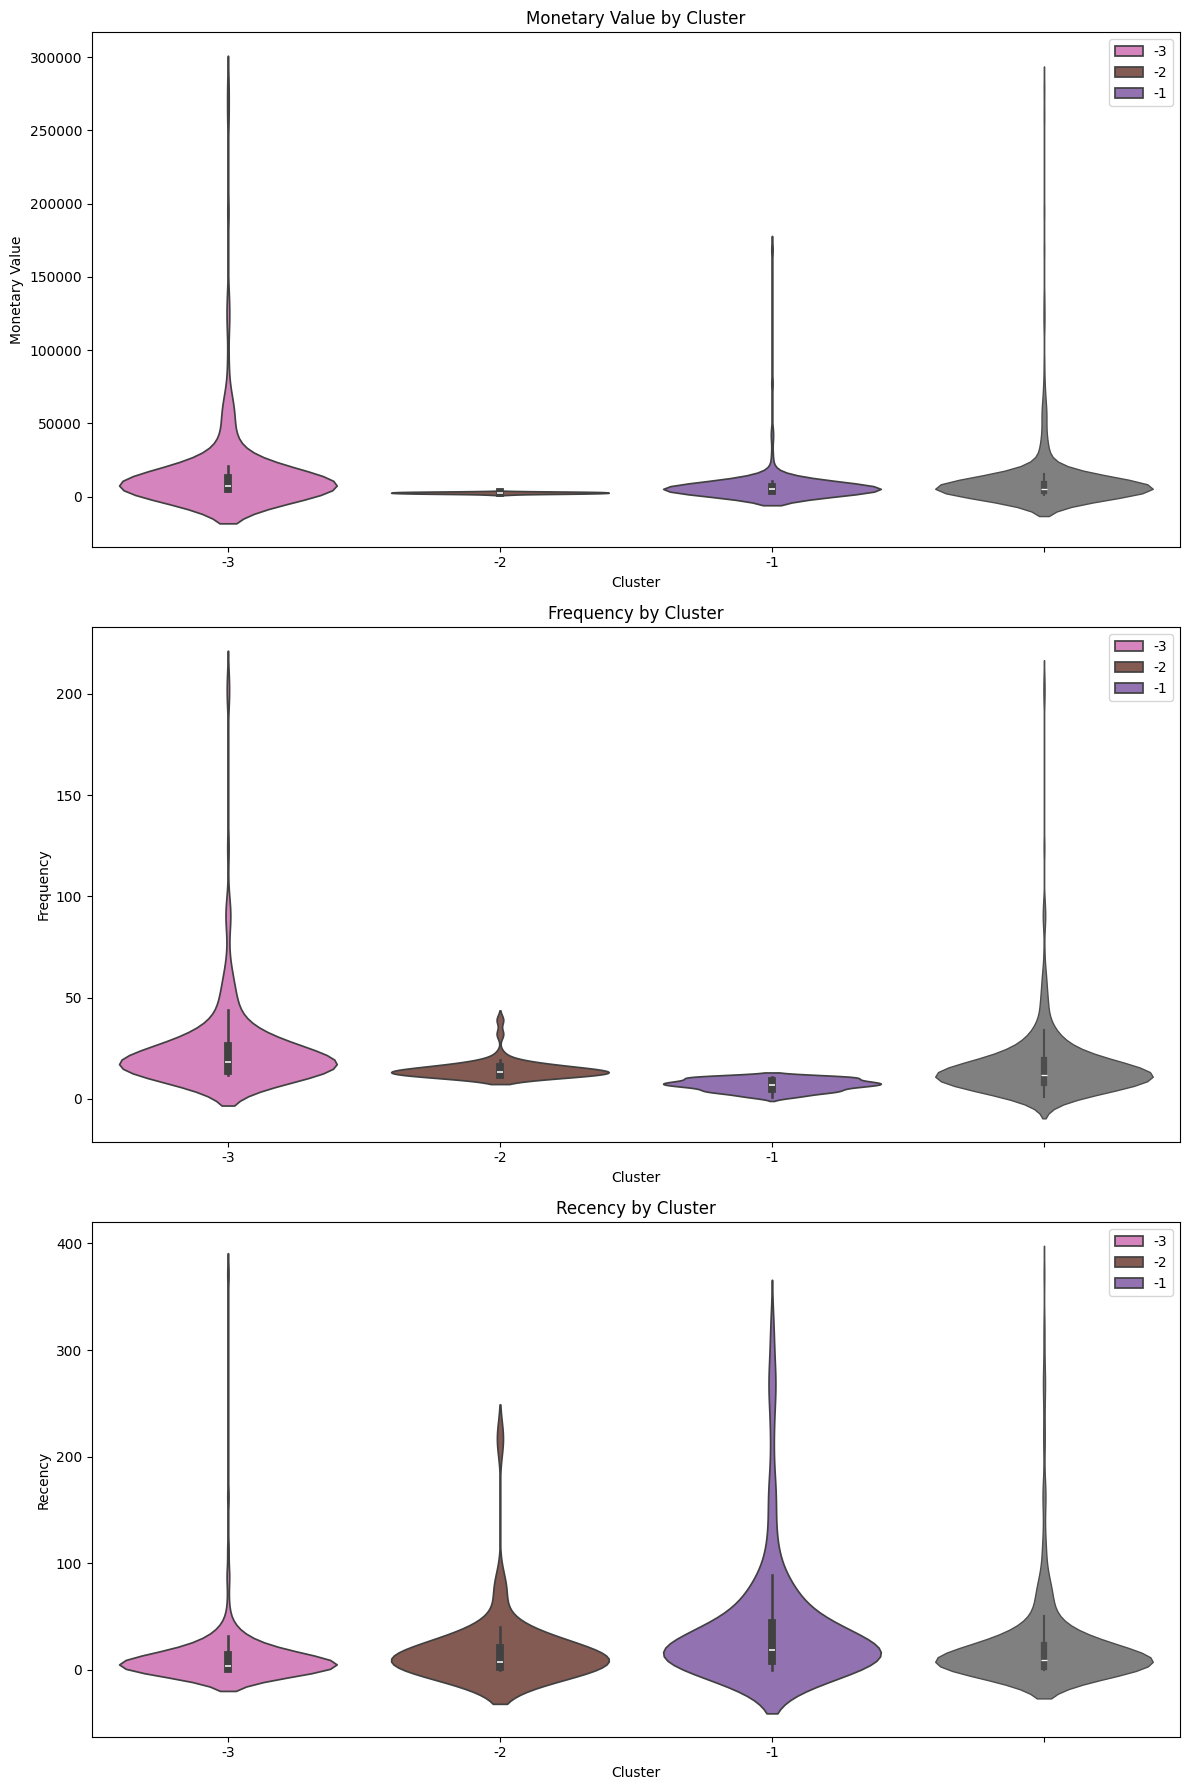

In [67]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster -1 (Monetary Outliers) PAMPER: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent. Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

Cluster -2 (Frequency Outliers) UPSELL: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

Cluster -3 (Monetary & Frequency Outliers) DELIGHT: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention. Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [68]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [69]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])

full_clustering_df


,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1
...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3


In [70]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,CustomerID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1437.24,4,2011-09-25 13:13:00,74,3,REWARD
3,12349.00,1457.55,1,2011-11-21 09:51:00,18,0,RETAIN
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12352.00,1385.74,7,2011-11-03 14:37:00,35,2,NURTURE
6,12353.00,89.00,1,2011-05-19 17:47:00,203,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4248,18172.00,7561.68,20,2011-11-25 11:12:00,14,-3,DELIGHT
4268,18198.00,5425.56,17,2011-12-05 14:49:00,3,-3,DELIGHT
4287,18223.00,6484.54,14,2011-12-05 09:11:00,4,-3,DELIGHT
4289,18225.00,5509.12,12,2011-12-06 13:27:00,2,-3,DELIGHT


Visualisation

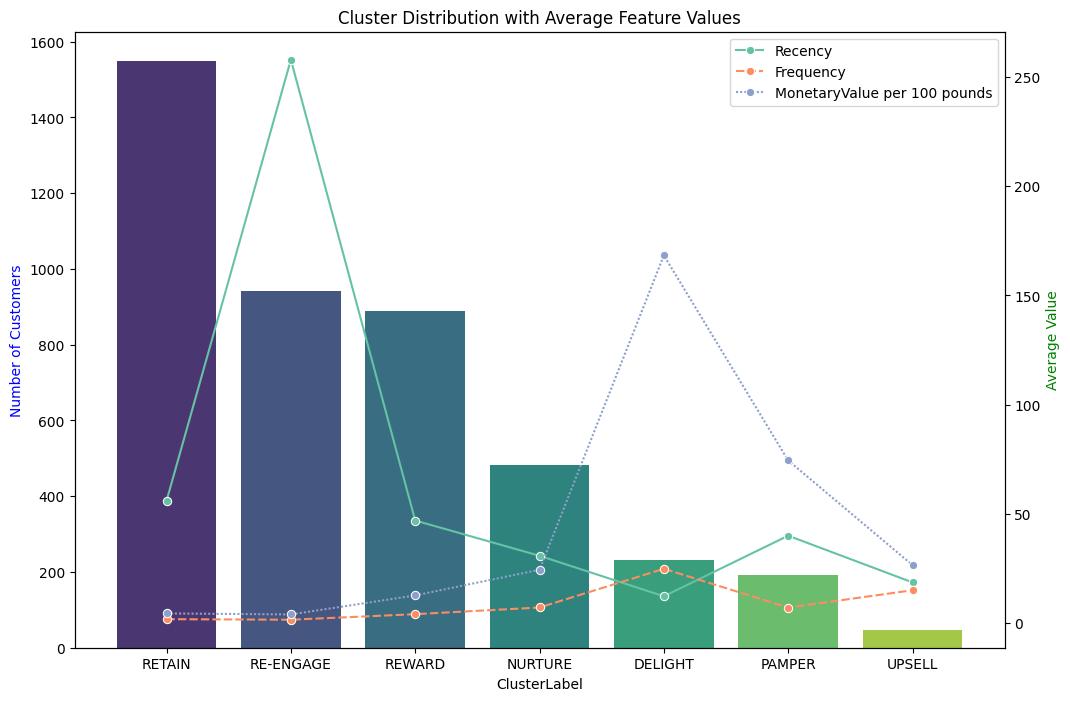

In [71]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()